# CS429: Information Retrieval

<br>

## Lecture 14: Logistic Regression

<br>

### Dr. Aron Culotta
### Illinois Institute of Technology

Recall classification problem notation:


- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=-1$: not spam
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.

** Training data:**

We are given training data $D = \{(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n)\}$

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|

How to classify a new instance?  
 "free money" -> $\{1,1\}$


**Recall Naive Bayes:**

$p(y|\vec{x}) = \frac{p(\vec{x}|y)p(y)}{p(\vec{x})}$

** Recall gradient descent recipe **

1.  Select a model type (e.g., linear classification, logistic classification)

2.  Select an <span>**error function**</span> that, when minimized, results in a good setting of the model parameters.

3.  Analytically determine the gradient of the error function with respect to the model parameters.

4.  Iteratively change the parameters by a small amount in the direction of the gradient until the (near) minimum of the error function is found.



Last time, we considered a simple linear model with two parameters:

$h(x_i) = mx_i + b$

This assumes only a single feature (term). 

Instead, we make $x_i$ a vector $\vec{x_i}$ containing values for $v$ terms: $\vec{x_i} = \{x_{i1} \ldots x_{iv}\}$, which has a corresponding vector of parameters $\vec{\theta}$.

$$ h(\vec{x}_i) = \vec{x}_i^T  {\theta} = x_{i1} \theta_1 + \ldots x_{iv} \theta_v = \sum_j x_{ij}{\theta}_j $$

In [2]:
from numpy import array as npa
import numpy as np

def h(x, theta):
    return np.dot(x.T, theta)

x = npa([1,2,3])  # term0 appears 1 time, term1 appears 2 times...
theta = npa([-1, -1, 5])  # term 2 predictive of positive class
h(x, theta)

12

In [3]:
# a negative example.
x2 = npa([10, 10, 0])
h(x2, theta)

-20

Given training data $D$, how do we pick $\vec{\theta}$?

Following the gradient descent recipe, we need an error function:

*Residual Sum of Squares*

$$
RSS(\theta, D) = \frac{1}{2}\sum_{i=1}^{|D|}(y_i - h(\vec{x}_i, \vec{\theta}))^2
$$



In [20]:
def rss(theta, D):
    error = 0
    for xi, yi in D:
        prediction = h(xi, theta)
        errori = (yi - prediction)**2
        error += errori
        #print('truth=%g  prediction=%g error=%g' % (yi, prediction, errori))
    return error / 2

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|


In [7]:
D = [
    (npa([0,0]), -1),
    (npa([1,0]), 1),
    (npa([1,1]), -1),
    (npa([1,1]), -1),
    (npa([1,0]), -1),
    (npa([1,1]), 1),
    (npa([0,0]), 1),
    (npa([0,1]), -1),
]
theta = npa([0,0])
print('\nRSS=%g' % rss(theta, D))

truth=-1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=0 error=1

RSS=4


In [8]:
theta = npa([1,1])
print('\nRSS=%g' % rss(theta, D))

truth=-1  prediction=0 error=1
truth=1  prediction=1 error=0
truth=-1  prediction=2 error=9
truth=-1  prediction=2 error=9
truth=-1  prediction=1 error=4
truth=1  prediction=2 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=1 error=4

RSS=14.5


In [9]:
theta = npa([0.5,-1])
print('\nRSS=%g' % rss(theta, D))

truth=-1  prediction=0 error=1
truth=1  prediction=0.5 error=0.25
truth=-1  prediction=-0.5 error=0.25
truth=-1  prediction=-0.5 error=0.25
truth=-1  prediction=0.5 error=2.25
truth=1  prediction=-0.5 error=2.25
truth=1  prediction=0 error=1
truth=-1  prediction=-1 error=0

RSS=3.625


**Goal:** Pick optimal $\vec{\theta}^*$ to satisfy:

$$ \vec{\theta}^*: argmin_\vec{\theta} \hspace{.4cm} RSS(\vec{\theta}, D)$$

**Solution:** Gradient descent

while not converged:
1. Compute gradient $\nabla_\vec{\theta}$ of $\vec{\theta}$ w.r.t. RSS
2. Change $\vec{\theta}$ in direction of $\nabla_\vec{\theta}$


$$\nabla_\vec{\theta} = \{\frac{\partial RSS(\vec{\theta}, D)}{\partial \theta_1} \ldots \frac{\partial RSS(\vec{\theta}, D)}{\partial \theta_v}\}$$

\begin{aligned}
\frac{\partial RSS(\vec{\theta}, D)}{\partial \theta_j} &=& \frac{\partial}{\partial \theta_j} \frac{1}{2}\sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)^2\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)\frac{\partial}{\partial \theta_j} (y_i - \theta \cdot \vec{x}_i)\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)(-x_{ij})\end{aligned}

**To update parameters:**

$${\vec{\theta}}^{t+1}_j = \vec{\theta}_j^{t} - \eta \sum_{i=1}^{|D|}(y_i - \vec{\theta}^t \cdot \vec{x}_i)x_{ij}$$

$\eta$ = "learning rate", to prevent "jumping over" minimum

In [12]:
def gradient(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        error = yi - h(xi, theta)
        for j, xij in enumerate(xi):
            result[j] += error * -xij# learning rate is 1
    return result

In [13]:
gradient(npa([0,0]), D)

array([ 1.,  2.])

In [14]:
rss(npa([-1, -2]), D)

truth=-1  prediction=0 error=1
truth=1  prediction=-1 error=4
truth=-1  prediction=-3 error=4
truth=-1  prediction=-3 error=4
truth=-1  prediction=-1 error=0
truth=1  prediction=-3 error=16
truth=1  prediction=0 error=1
truth=-1  prediction=-2 error=1


15.5

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def gradient_descent(h_fn, gradient_fn, error_fn, theta,
                     learning_rate, D, tolerance, max_iters):
    errori = error_fn(theta, D)
    iters = 0
    all_errors = [errori]
    while True:
        iters += 1
        print('\n\niteration %d' % iters)
        grad = gradient_fn(theta, D)
        theta -= learning_rate * grad  # UPDATE!
        newerror = error_fn(theta, D)
        all_errors.append(newerror)
        print('old error=%g   new error=%g  theta=%s\n\n' %
              (errori, newerror, str(theta)))
        error_diff = errori - newerror
        if error_diff < 0 or errori - newerror < tolerance \
            or iters >= max_iters:
            break
        else:
            errori = newerror
            
    plt.plot(all_errors, 'bo-')
    plt.xlabel('iteration')
    plt.ylabel('error')
    return theta



iteration 1
old error=14.5   new error=6.4  theta=[-0.8 -0.8]




iteration 2
old error=6.4   new error=4.2616  theta=[ 0.28 -0.08]




iteration 3
old error=4.2616   new error=3.68618  theta=[-0.152 -0.584]




iteration 4
old error=3.68618   new error=3.52599  theta=[ 0.1504 -0.4256]




iteration 5
old error=3.52599   new error=3.47882  theta=[ 0.05536 -0.57536]




iteration 6
old error=3.47882   new error=3.46374  theta=[ 0.145216 -0.548288]




iteration 7
old error=3.46374   new error=3.45839  theta=[ 0.1289728 -0.5967872]




array([ 0.1289728, -0.5967872])

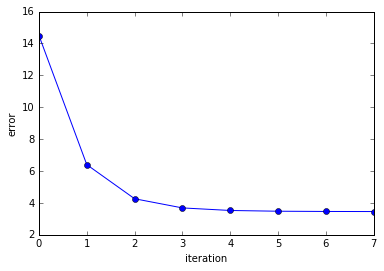

In [22]:
theta = npa([1.,1.])
gradient_descent(h, gradient, rss, theta, .2, D, .01, 10)

**Does our error function make sense?**


iteration 1  
truth=-1  prediction=0 error=1  
truth=1  prediction=-0.8 error=3.24  
**truth=-1  prediction=-1.6 error=0.36**


The above assumes that the output variable $y_i$ is a real number. Thus, this is a model of <span>**regression**</span>.  

When $y$ is disrete, the problem is one of <span>**classification**</span>.  

One could use the linear model above to do classification. Assume the binary case where $y_i$ can either be $-1$ or $1$. We can convert the regression model to a classifier by assuming that if the model outputs a number greater than 0, then predict 1; otherwise, predict -1.

However, this can cause weird things to happen in our update rule: 

$$\vec{\theta}_j^{t+1} = \vec{\theta}_j^{t} + \eta \sum_{i=1}^{|D|}(y_i - \vec{\theta}^t \cdot \vec{x}_i)x_{ij}$$


Suppose the true value of $y_1$ is $1$, and the model (dot product) returns 2. The instance is technically classified correctly, but the update still counts this as an error of size 1 (since $y_i -\theta \cdot x_i$ is 1). In fact, the update considers this error equivalent to a dot product of $0$, which would in fact result in a classification error.

This is clearly not what we want – in fact, our gradient descent algorithm may never converge, since we can always make our correct classifications “more correct” by cranking up the value of $\theta$.

The way around this is to change our model. Rather than regression, we need classification. We can do this by passing the dot product $x_i \cdot \theta$ through a “squashing function” (the **logistic function**) that ensures its value is always between 0 and 1: 

$$h(\vec{x}_i) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

This is called **logistic regression.**


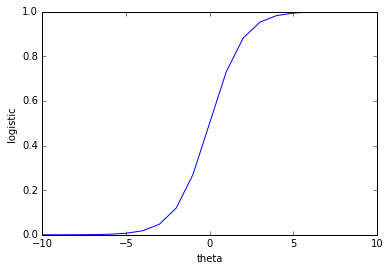

In [23]:
from math import exp
def logistic(x, theta):
    return 1 / (1 + exp(-h(x, theta)))
    
x = npa([1])

plt.figure()
plt.plot(range(-10, 10), [logistic(x, theta) for theta in range(-10, 10)])
plt.xlabel('theta')
plt.ylabel('logistic')
plt.show()

Because $h(x_i)$ will always be between 0 and 1, and will sum to one for both classes, we have the right to call this a <span>**probability**</span> $p(y_i=1|\vec{x}_i)$.  

$$h(\vec{x}_i) = p(y_i=1|\vec{x}_i) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

and, for binary classification, the probability of a negative example:

$$
p(y_i=-1|\vec{x}_i) = 1 - p(y_i=1|\vec{x}_i)
$$

with some algebra, it turns out that:

$$
p(y_i=-1|\vec{x}_i) = \frac{1}{1 + e^{\vec{x}_i \cdot \vec{\theta}}}
$$

Because of this, if $y_i \in \{-1, 1\}$, we can write:

$$
p(y_i|\vec{x}_i) =  \frac{1}{1 + e^{-y_i \vec{x}_i \cdot \vec{\theta}}}
$$

**What is a good error function for logistic regression?**

We can now rephrase our learning objective as maximizing the <span>*joint probability of the true labels for all training instances.*</span>  

Since we assume each instance is drawn independently, we can write this joint probability as a product of individual probabilities: 

$$p(y_1 \ldots y_n|\vec{x}_1 \ldots \vec{x}_n) = p(y_1|\vec{x}_1) * p(y_2|\vec{x}_2) * \ldots * p(y_n|\vec{x}_n) = \prod_{i=1}^{n}p(y_i|\vec{x}_i)$$

Because we’re used to minimizing functions using gradient descent, rather than maximizing the probability, we can instead minimize the negative probability. This is our new error function: 

$$
E(D, h) = - \prod_{i=1}^{n}p(y_i|x_i)
$$

Note that this is very similar to RSS, but by using probabilities, we ensure that the output for each instance is always between 0 and 1.


Following our learning recipe, our next step is to minimize $E(D,h)$ using gradient descent.  

Computing the gradient of $E(D,h)$ in its current form is rather hard. So, we can simply transform it to something that’s easier to take the gradient of: 

$$E(D,h) = - \ln \prod_{i=1}^n  p(y_i|\vec{x}_i) = -\sum_i \ln p(y_i|\vec{x}_i)$$

This is called the <span>**negative log likelihood**</span>. It turns out that minimizing f(x) or ln f(x) results in the same answer, so we can make this transformation without affecting our final solution.


In [24]:
from math import log

def nll(theta, D):
    total = 0
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        print('truth=%g  pr(true label)=%g' % (yi, pred))
        total += log(pred)
    return -total


Now we’re ready to calculate the gradient with respect to one parameter $\theta_j$:

$$
\begin{aligned}
\frac{\partial E(D,h)}{\partial \theta_j} & =  \frac{\partial}{\partial \theta_j}- \ln \prod_i \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \\
& =   \frac{\partial}{\partial \theta_j}-  \sum_i \ln \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{(by definition of log of products)}\\
& =   -  \sum_i 1 + e^{-y_i x_i \cdot \theta} \frac{\partial}{\partial \theta_j} \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad  \hbox{  (by }\frac{d}{dx}\ln(f(x)) = \frac{1}{f(x)} \frac{d}{dx}f(x) ) \\
& =   -  \sum_i (1 + e^{-y_i x_i \cdot \theta})\Big(\frac{-y_ix_{ij} e^{-y_ix_i \cdot \theta}}{(1 + e^{-y_ix_i\cdot \theta})^2}\Big) \quad \hbox{    (by quotient and chain rules) }\\
& =  - \sum_i \frac{-y_i x_{ij} e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{     (by algebra) }\\
& =  \sum_i y_i x_{ij} (1 - p(y_i | x_i)) \quad \Big( \hbox{by }\frac{e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} = 1 - p(y_i|x_i) \Big)
\end{aligned}
$$

Thus, the final logistic regression update is: 

$$
\vec{\theta}_j^{t+1} \leftarrow \vec{\theta}_j^{t} + \eta \sum_i y_i x_{ij}(1-p(y_i|\vec{x}_i))
$$



In [135]:
def gradient_logistic(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        error = yi * pred
        for j, xij in enumerate(xi):
            result[j] += error * xij
    return result

truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.731059
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.268941
truth=1  pr(true label)=0.880797
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.268941


iteration 1
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.708797
truth=-1  pr(true label)=0.135614
truth=-1  pr(true label)=0.135614
truth=-1  pr(true label)=0.291203
truth=1  pr(true label)=0.864386
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.276347
old error=8.70686   new error=8.39193  theta=[ 0.88954916  0.96265502]




iteration 2
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.687504
truth=-1  pr(true label)=0.151942
truth=-1  pr(true label)=0.151942
truth=-1  pr(true label)=0.312496
truth=1  pr(true label)=0.848058
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.282727
old error=8.39193   new error=8.12073  theta=[ 0.78847403  0.930974  ]




iteration 3
truth=-1  pr(true label)=0.5
truth=

array([ 0.08087117,  0.89424926])

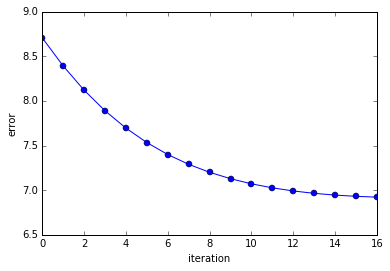

In [141]:
theta = npa([1.,1.])
gradient_descent(logistic, gradient_logistic, nll, theta, .1, D, .01, 50)

truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.731059
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.268941
truth=1  pr(true label)=0.880797
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.268941


iteration 1
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.529066
truth=-1  pr(true label)=0.306266
truth=-1  pr(true label)=0.306266
truth=-1  pr(true label)=0.470934
truth=1  pr(true label)=0.693734
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.331537
old error=8.70686   new error=6.61226  theta=[ 0.11639329  0.70124015]




iteration 2
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.501232
truth=-1  pr(true label)=0.28773
truth=-1  pr(true label)=0.28773
truth=-1  pr(true label)=0.498768
truth=1  pr(true label)=0.71227
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.28874
old error=6.61226   new error=6.84559  theta=[ 0.00492745  0.901509  ]




array([ 0.00492745,  0.901509  ])

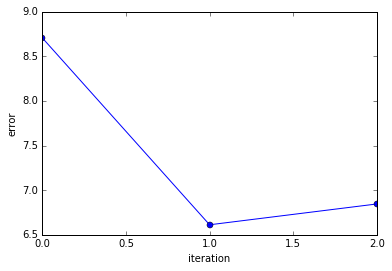

In [142]:
# What if learning rate too big?
theta = npa([1.,1.])
gradient_descent(logistic, gradient_logistic, nll, theta, .8, D, .01, 50)
# We stop too early!

probability. This is our new error function: 

$$
E(D, h) = - \prod_{i=1}^{n}p(y_i|x_i) + \lambda \sum_k \theta_k^2
$$